In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import sys
sys.path.insert(0,'../../')
from X22_model.disk_model import *

In [15]:
def get_opacity(amax):
    opacity = generate_opacity_table_opt(
        a_min=1e-6, a_max=amax*1e-4,
        q=-3.5, dust_to_gas=0.01
    )
    return opacity

def plot_opacity(ax, opacity, **kwargs):
    T_grid = opacity['T']
    lam = opacity['lam'] * 10 # wavelenght in mm
    kappa_abs = opacity['kappa'] # absorption opacity
    kappa_sca = opacity['kappa_s'] # effective scattering opacity
    kappa_ros = opacity['kappa_r'] # Rosseland mean opacity
    kappa_pla = opacity['kappa_p'] # Planck mean opacity
    plt.sca(ax[0])
    plt.plot(T_grid, kappa_pla, **kwargs)
    plt.plot(T_grid, kappa_ros, ls='--',label='_nolegend_', **kwargs)
    plt.xscale('log'); plt.yscale('log')
    plt.xlim(2e1,2e3); plt.xlabel(r'$T$ [K]')
    plt.ylim(3e-2,1e2); plt.ylabel(r'$\kappa_{\rm P}, \kappa_{\rm R}$ [cm$^2$ g$^{-1}$]')
    
    plt.sca(ax[1])
    plt.plot(lam, kappa_abs[0], **kwargs)
    plt.plot(lam, kappa_sca[0], ls=':',label='_nolegend_', **kwargs)
    plt.xscale('log');plt.yscale('log')
    plt.xlim(1e-1, 1e1); plt.xlabel(r'$\lambda$ [mm]')
    plt.ylim(1e-4,1e0); plt.ylabel(r'$\kappa_\nu$ [cm$^2$ g$^{-1}$]')

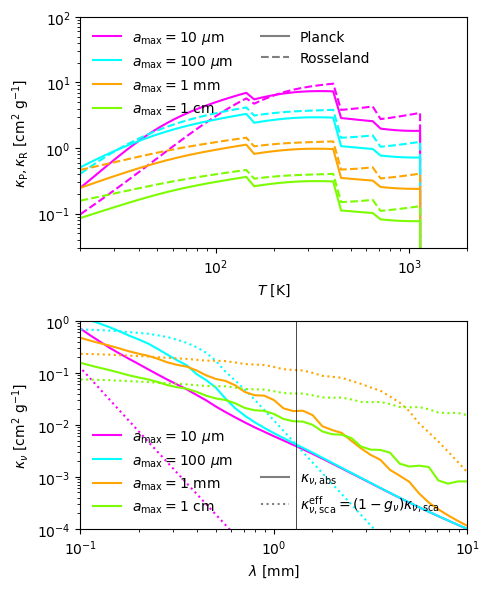

In [16]:
fig, ax = plt.subplots(
    2,1,figsize=(5,6),
    gridspec_kw = {'height_ratios': [1,0.9]},
)

plot_opacity(ax, get_opacity(1e1), color='magenta')
plot_opacity(ax, get_opacity(1e2), color='cyan')
plot_opacity(ax, get_opacity(1e3), color='orange')
plot_opacity(ax, get_opacity(1e4), color='lawngreen')

plt.sca(ax[0])
plt.plot([],[],'tab:grey',ls='-')
plt.plot([],[],'tab:grey',ls='--')
plt.plot([],[],alpha=0)
plt.plot([],[],alpha=0)
plt.legend(
    [r'$a_{\rm max}=10~\mu$m',
    r'$a_{\rm max}=100~\mu$m',
    r'$a_{\rm max}=1~$mm',
    r'$a_{\rm max}=1~$cm',
    r'Planck',
    r'Rosseland',
    '',''],
    frameon=False, loc=2, ncol=2, fontsize=10,
)

plt.sca(ax[1])
plt.plot([],[],ls='None')
plt.plot([],[],ls='None')
plt.plot([],[],'grey')
plt.plot([],[],'grey',ls=':')
# plt.plot([0.087, 0.087],plt.ylim(),'k',lw=0.5)
plt.plot([1.3, 1.3],plt.ylim(),'k',lw=0.5)
plt.legend(
    [r'$a_{\rm max}=10~\mu$m',
    r'$a_{\rm max}=100~\mu$m',
    r'$a_{\rm max}=1~$mm',
    r'$a_{\rm max}=1~$cm',
    '','',
    r'$\kappa_{\nu,\rm abs}$',
    r'$\kappa_{\nu,\rm sca}^{\rm eff} = (1-g_{\nu})\kappa_{\nu,\rm sca}$',
    ],
    frameon=False, fontsize=10, ncol=2,
)

plt.tight_layout()
plt.savefig('opacity.pdf', transparent=True)
plt.show()
plt.close('all')

In [17]:
def plot_dif_t_regime(ax, opacity, **kwargs):
    lam = opacity['lam'] * 10 # wavelenght in mm
    kappa_abs = opacity['kappa'] # absorption opacity
    kappa_sca = opacity['kappa_s'] # effective scattering opacity
    
    for i in range(len(kappa_abs)):
        plt.sca(ax[i])
        plt.plot(lam, kappa_abs[i], **kwargs)
        plt.plot(lam, kappa_sca[i], ls=':',label='_nolegend_', **kwargs)
        plt.xscale('log');plt.yscale('log')
        plt.xlim(1e-1, 1e1)
        plt.ylim(1e-4, 1e0); plt.ylabel(r'$\kappa_\nu$ [cm$^2$ g$^{-1}$]')
        if i == 3:
            plt.xlabel(r'$\lambda$ [mm]')
    
    

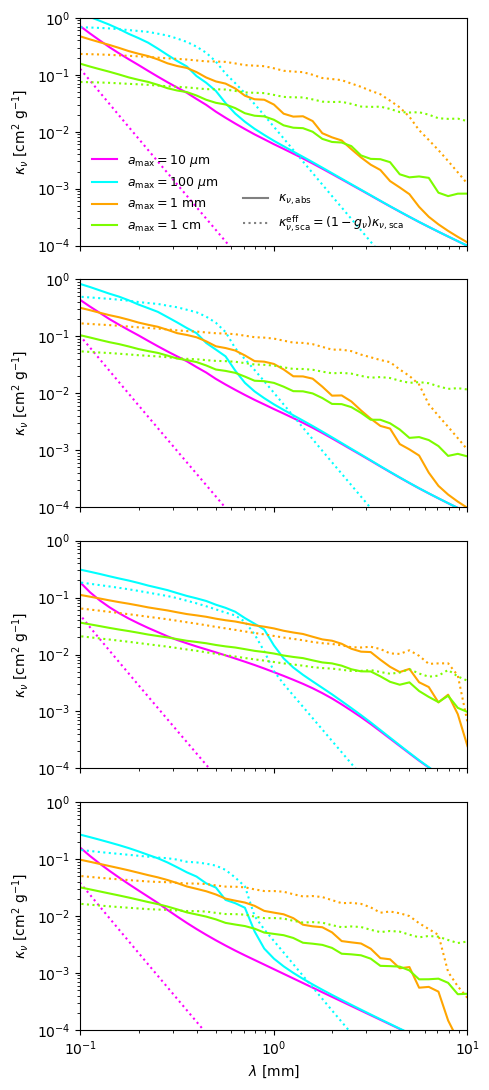

In [18]:
fig, ax = plt.subplots(
    4,1,figsize=(5,11), sharex=True,
    gridspec_kw = {'height_ratios': [1, 1, 1, 1]},
)

plot_dif_t_regime(ax, get_opacity(1e1), color='magenta')
plot_dif_t_regime(ax, get_opacity(1e2), color='cyan')
plot_dif_t_regime(ax, get_opacity(1e3), color='orange')
plot_dif_t_regime(ax, get_opacity(1e4), color='lawngreen')


plt.sca(ax[0])
plt.plot([],[],ls='None')
plt.plot([],[],ls='None')
plt.plot([],[],'grey')
plt.plot([],[],'grey',ls=':')
plt.legend(
    [r'$a_{\rm max}=10~\mu$m',
    r'$a_{\rm max}=100~\mu$m',
    r'$a_{\rm max}=1~$mm',
    r'$a_{\rm max}=1~$cm',
    '','',
    r'$\kappa_{\nu,\rm abs}$',
    r'$\kappa_{\nu,\rm sca}^{\rm eff} = (1-g_{\nu})\kappa_{\nu,\rm sca}$',
    ],
    frameon=False, fontsize=9, ncol=2,
)

plt.tight_layout()
plt.show()